# Datasets Description

This IPython Notebook describes the two datasets presented in: 

> L. Giancardo, A. Sánchez-Ferro, T. Arroyo-Gallego, I. Butterworth, C. S. Mendoza, P. Montero, M. Matarazzo, J. A. Obeso, M. L. Gray & R. San José Estépar. Computer keyboard interaction as an indicator of early Parkinson's disease. Sci. Rep. 6, 34468; doi: 10.1038/srep34468 (2016)

The Early Parkinson's Disease dataset is referred as MIT-CS1PD; the De-Novo Parkinson's Disease dataset is  referred as MIT-CS2PD. It also shows how to load timepress data from the datasets.

These datasets have been collected thanks to the financial support by the Comunidad de Madrid, Fundacion Ramon Areces and The Michael J Fox Foundation for Parkinson's research (grant number 10860). We thank the M + Vision faculty for their guidance in developing this project. We also thank our many clinical collaborators at MGH in Boston, at “12 de Octubre”, Hospital Clinico and Centro Integral en Neurociencias HM CINAC in Madrid for their insightful contributions.

This notebook requires:
- Python 2.7
- IPython
- Pandas
- Numpy
- Matplotlib

## PD_MIT-CS1PD dataset

The MIT_CS1PD dataset includes the typing information collected on a population sample of 31 subjects,
13 healthy controls and 18 Parkinson’s disease (PD) sufferers. The subjects were recruited from two
movement disorder units in Madrid (Spain) following the institutional protocols approved by the
Massachusetts Institute of Technology, USA (Committee on the Use of Humans as Experimental Subjects
approval no. 1402006203), Hospital 12 de Octubre, Spain (no. CEIC:14/090) and Hospital Clinico San
Carlos, Spain (no. 14/136-E).

Each data file includes the timing information collected during two sessions of typing activity using a
standard word processor on a Lenovo G50-70 i3-4005U with 4MB of memory and a 15 inches screen
running Manjaro Linux. Subjects were instructed to type as they normally would do at home and they
were left free to correct typing mistakes only if they wanted to. The key acquisition software presented
a temporal resolution of 3/0.28 (mean/std) milliseconds.


Subjects were asked to visit a movement disorder unit twice to complete the study. Clinical evaluation
includes UPDRS and finger tapping tests.

Usage policy
---------
---------

This dataset is free to use for research purposes only. We encourage researchers to try
new computational algorithms on these data. Any time MIT_CS1PD is used for publishing or presenting the following publication needs to be referenced 

> L. Giancardo, A. Sánchez-Ferro, T. Arroyo-Gallego, I. Butterworth, C. S. Mendoza, P. Montero, M. Matarazzo, J. A. Obeso, M. L. Gray & R. San José Estépar. Computer keyboard interaction as an indicator of early Parkinson's disease. Sci. Rep. 6, 34468; doi: 10.1038/srep34468 (2016)


### Ground truth loading

The ground truth used to describe motor impairment on each participant. The GT value discriminate the two classes in the sample population (CNT-False and PD-True). The results of the clinical evaluation, UPDRS-
III, alternating finger tapping, single key tapping, neuroQWERTY score and typing speed are
included in updrs108, afTap, sTap, nqScore, typingSpeed, respectively.

Columns file_1 and file_2 correspond to the first and second repetition

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nqDataLoader as nq #data loading library

In [68]:
# load ground Ground Truth 
cs1PdFr = pd.read_csv( 'MIT-CS1PD/GT_DataPD_MIT-CS1PD.csv' )
# set Patient ID as index
cs1PdFr = cs1PdFr.set_index('pID')
# show part of Data Frame
cs1PdFr.head()

,gt,updrs108,afTap,sTap,nqScore,typingSpeed,file_1,file_2
pID,,,,,,,,
11,True,14.25,NaN,162.25,0.117543,189.372549,1402930351.011_001_014.csv,1403706430.011_003_014.csv
60,False,2.00,NaN,162.25,0.070350,60.533333,1402932300.060_001_014.csv,1403708258.060_003_014.csv
67,True,25.25,NaN,133.75,0.223411,54.333333,1401117235.067_001_014.csv,1401978395.067_003_014.csv
68,False,6.00,NaN,159.00,0.074973,71.800000,1401114972.068_001_014.csv,1401980765.068_003_014.csv
70,True,26.25,NaN,113.50,0.175751,39.614035,1404311419.070_001_014.csv,1404743687.070_003_014.csv


In here it is shown how to load the typing data

In [66]:
# load typing data for patient 60 (first repetition)
# this method automatically filters out meta keys, mouse presses and backspace
keyPressed, htArr, pressArr, releaseArr = \
            nq.getDataFiltHelper( 'MIT-CS1PD/data_MIT-CS1PD/' + cs1PdFr.loc[60]['file_1'])

here we diplay the raw hold time

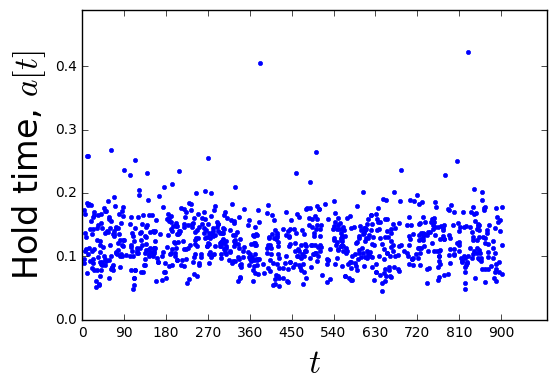

In [67]:
def plotRawHT(pressArrIn, htArrIn, maxWinID=3):
    winSize = 90
    lblfSize = 24
    plt.figure()
    plt.ion()
    plt.plot( pressArrIn, htArrIn, '.' )
    plt.ylim(0,0.49)
    plt.xticks( range( 0, np.int(np.max(pressArrIn)), winSize ) )
#     rmBorder( plt.gca() )
    plt.xlabel( '$t$', fontsize=lblfSize )
    plt.ylabel( 'Hold time, $a[t]$', fontsize=lblfSize )
    plt.show()
    

plotRawHT( pressArr, htArr  )

## PD_MIT-CS2PD dataset

The MIT_CS2PD dataset includes the typing information collected on a population sample of 54 subjects,
30 healthy controls and 24 Parkinson’s disease (PD) sufferers. The subjects were recruited from two
movement disorder units in Madrid (Spain) following the institutional protocols approved by the
Massachusetts Institute of Technology, USA (Committee on the Use of Humans as Experimental Subjects
approval no. 1402006203), Hospital 12 de Octubre, Spain (no. CEIC:14/090) and Hospital Clinico San
Carlos, Spain (no. 14/136-E).

Each data file includes the timing information collected during a session of typing activity using a
standard word processor on a Lenovo G50-70 i3-4005U with 4MB of memory and a 15 inches screen
running Manjaro Linux. Subjects were instructed to type as they normally would do at home and they
were left free to correct typing mistakes only if they wanted to. The key acquisition software presented
a temporal resolution of 3/0.28 (mean/std) milliseconds. Clinical evaluation includes UPDRS and finger tap


Subjects were asked to visit a movement disorder unit once to complete the study. Clinical evaluation
includes UPDRS and finger tapping tests.

Usage policy
---------
---------

This dataset is free to use for research purposes only. We encourage researchers to try
new computational algorithms on these data. Any time MIT_CS1PD is used for publishing or presenting the following publication needs to be referenced 

> L. Giancardo, A. Sánchez-Ferro, T. Arroyo-Gallego, I. Butterworth, C. S. Mendoza, P. Montero, M. Matarazzo, J. A. Obeso, M. L. Gray & R. San José Estépar. Computer keyboard interaction as an indicator of early Parkinson's disease. Sci. Rep. 6, 34468; doi: 10.1038/srep34468 (2016)


### Ground truth loading

The ground truth used to describe motor impairment on each participant. The GT value discriminate the two classes in the sample population (CNT-False and PD-True). The results of the clinical evaluation, UPDRS-
III, alternating finger tapping, single key tapping, neuroQWERTY score and typing speed are
included in updrs108, afTap, sTap, nqScore, typingSpeed, respectively.

In [78]:
# load ground Ground Truth 
cs2PdFr = pd.read_csv( 'MIT-CS2PD/GT_DataPD_MIT-CS2PD.csv' )
# set Patient ID as index
cs2PdFr = cs2PdFr.set_index('pID')
# show part of Data Frame
cs2PdFr.head()

,gt,updrs108,afTap,sTap,nqScore,typingSpeed,file_1
pID,,,,,,,
1000,True,27,79.0,184.5,0.107179,56.866667,1424946827.1000_001_014.csv
1001,True,16,96.5,189.0,0.056286,118.000000,1427279751.1001_001_014.csv
1002,False,5,140.0,158.0,0.039519,119.037037,1426676689.1002_001_014.csv
1004,True,22,83.5,191.5,0.034853,74.266667,1429866367.1004_001_014.csv
1005,True,17,68.0,150.0,0.048307,74.969697,1430134526.1005_001_014.csv


In here it is shown how to load the typing data

In [79]:
# load typing data for patient 1000
# this method automatically filters out meta keys, mouse presses and backspace
keyPressed, htArr, pressArr, releaseArr = \
            nq.getDataFiltHelper( 'MIT-CS2PD/data_MIT-CS2PD/' + cs2PdFr.loc[1000]['file_1'])

here we diplay the raw hold time

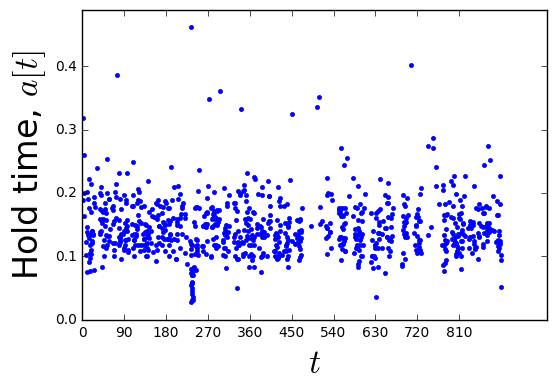

In [80]:
plotRawHT( pressArr, htArr  )